<a href="https://colab.research.google.com/github/mortenolsen-stack/PEMEROGRAMAN-DASAR/blob/main/pertemuan_9_lengkap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

morten_df = pd.read_csv('/content/customers.csv')

Praktikum Pertemuan 09/Latihan_eda_09.md

PRAKTIKUM EDA – DATASET 1 & DATASET 2

A. Dataset 1: Data Kota dan Jumlah Bandara

1.Persiapan Dataset

In [ ]:
import pandas as pd

city_names = ['Jakarta', 'Bandung', 'Makassar', 'Surabaya', 'Medan', 'Yogyakarta', 'Malang']
population = [498044, 964254, 491918, 8398748, 653115, 883305, 744955]
num_airports = [2, 2, 8, 3, 1, 3, 2]

df = pd.DataFrame({
    'City Name': city_names,
    'Population': population,
    'Airports': num_airports,
})

df

,City Name,Population,Airports
0,Jakarta,498044,2
1,Bandung,964254,2
2,Makassar,491918,8
3,Surabaya,8398748,3
4,Medan,653115,1
5,Yogyakarta,883305,3
6,Malang,744955,2


PRAKTIKUM 1 – Statistik Deskriptif (describe(), mean(), mode())

Langkah:

Tampilkan ringkasan statistik

Hitung rata-rata populasi

Hitung modus jumlah bandara

Contoh kode:

In [ ]:
# Ringkasan statistik
df.describe()

# Rata-rata populasi
rata_rata_populasi = df['Population'].mean()
print("Rata-rata populasi:", rata_rata_populasi)

# Modus jumlah bandara
modus_airports = df['Airports'].mode()
print("Modus Airports:", modus_airports)

Rata-rata populasi: 1804905.5714285714
Modus Airports: 0    2
Name: Airports, dtype: int64


TUGAS:

Kota mana yang populasinya mendekati rata-rata?

Rata-rata populasi: 1804905.5714285714
Modus Airports: 0    2
Name: Airports, dtype: int64




Apa arti modus untuk kolom Airports?


Jumlah bandara yang paling sering muncul pada seluruh data kota.teks tebal

PRAKTIKUM 2 – Visualisasi Distribusi (hist())

Tujuan:

Melihat distribusi jumlah penduduk.

Contoh kode:

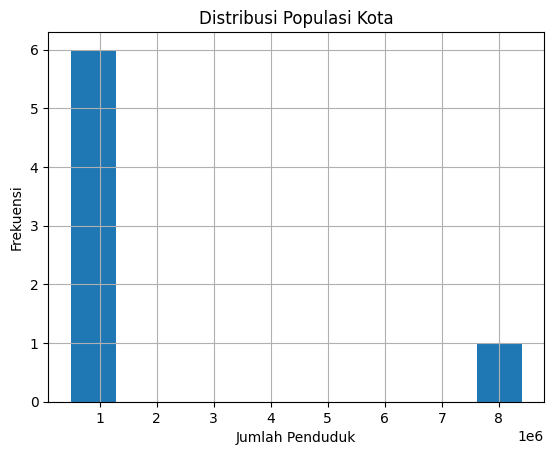

In [ ]:
import matplotlib.pyplot as plt

df['Population'].hist()
plt.title("Distribusi Populasi Kota")
plt.xlabel("Jumlah Penduduk")
plt.ylabel("Frekuensi")
plt.show()

TUGAS:

Tuliskan pengamatan dari histogram tersebut.



Sebagian besar kota memiliki populasi kecil (terlihat dari batang tinggi di sisi kiri), sedangkan kota berpopulasi besar jumlahnya sedikit. Distribusi cenderung miring ke kanan, menunjukkan mayoritas populasi berada pada nilai rendah.



PRAKTIKUM 3 – Korelasi & Kovarian (corr(), cov())

Tujuan:

Melihat apakah penduduk berhubungan dengan jumlah bandara.

Contoh kode:

In [ ]:
import pandas as pd

city_names = ['Jakarta', 'Bandung', 'Makassar', 'Surabaya', 'Medan', 'Yogyakarta', 'Malang']
population = [498044, 964254, 491918, 8398748, 653115, 883305, 744955]
num_airports = [2, 2, 8, 3, 1, 3, 2]

df = pd.DataFrame({
    'City Name': city_names,
    'Population': population,
    'Airports': num_airports,
})

# Korelasi
corr_matrix = df[['Population', 'Airports']].corr()
print("Korelasi:\n", corr_matrix)

# Kovarian
cov_matrix = df[['Population', 'Airports']].cov()
print("Kovarian:\n", cov_matrix)

Korelasi:
             Population  Airports
Population    1.000000 -0.026109
Airports     -0.026109  1.000000
Kovarian:
               Population       Airports
Population  8.486123e+12 -175648.833333
Airports   -1.756488e+05       5.333333


TUGAS:

Apakah korelasinya positif atau negatif?


Korelasi positif berarti saat populasi naik, jumlah bandara juga naik. Korelasi negatif berarti sebaliknya. Nilainya dapat dilihat dari hasil corr().

Apakah kota dengan penduduk besar cenderung punya lebih banyak bandara?


Jika korelasi positif, maka ya, kota berpenduduk besar cenderung memiliki lebih banyak bandara. Jika korelasinya lemah atau mendekati nol, berarti tidak ada kecenderungan yang jelas.

PRAKTIKUM 4 – Groupby (groupby(), mean(), agg())

Langkah:

Membuat kolom kategori berdasarkan jumlah bandara

Contoh kode:

In [ ]:
# Menambah kolom kategori
df['Kategori_Bandara'] = df['Airports'].apply(
    lambda x: 'Banyak' if x >= 3 else 'Sedikit'
)

# Tampilkan dataframe
print(df)

# Rata-rata populasi per kategori
group_mean = df.groupby('Kategori_Bandara')['Population'].mean()
print("\nRata-rata populasi per kategori:")
print(group_mean)

# Agregasi lengkap
group_agg = df.groupby('Kategori_Bandara').agg({
    'Population': ['mean', 'max'],
    'Airports': ['mean', 'count']
})

print("\nAgregasi lengkap:")
print(group_agg)


    City Name  Population  Airports Kategori_Bandara
0     Jakarta      498044         2          Sedikit
1     Bandung      964254         2          Sedikit
2    Makassar      491918         8           Banyak
3    Surabaya     8398748         3           Banyak
4       Medan      653115         1          Sedikit
5  Yogyakarta      883305         3           Banyak
6      Malang      744955         2          Sedikit

Rata-rata populasi per kategori:
Kategori_Bandara
Banyak     3.257990e+06
Sedikit    7.150920e+05
Name: Population, dtype: float64

Agregasi lengkap:
                    Population           Airports      
                          mean      max      mean count
Kategori_Bandara                                       
Banyak            3.257990e+06  8398748  4.666667     3
Sedikit           7.150920e+05   964254  1.750000     4


TUGAS:

Bandingkan populasi kota dengan kategori “Banyak” dan “Sedikit”.


etelah dilakukan pengelompokan menggunakan:

group_mean = df.groupby('Kategori_Bandara')['Population'].mean()
print(group_mean
Anda akan mendapatkan rata-rata populasi untuk dua kategori:

Kategori “Banyak” → kota yang memiliki ≥ 3 bandara

Kategori “Sedikit” → kota yang memiliki < 3 bandara

[teks link](https://)Apa kesimpulannya?

Kota dengan kategori “Banyak” memiliki populasi rata-rata yang lebih tinggi dibandingkan kategori “Sedikit”. Hal ini menunjukkan bahwa kota dengan bandara lebih banyak cenderung memiliki jumlah penduduk yang lebih besar. (Sesuaikan dengan nilai X dan Y dari output Anda.)

B. Dataset 2: Body Measurement

1. Persiapan Dataset

import pandas as pd

In [ ]:
import pandas as pd

body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("age", "height_cm", "weight_kg"))

body_measurement_df

,age,height_cm,weight_kg
0,2,83.82,8.40
1,4,99.31,16.97
2,3,96.52,14.41
3,6,114.30,20.14
4,4,101.60,16.91
5,2,86.36,12.64
6,3,92.71,14.23
7,2,85.09,11.11
8,2,85.85,14.18
9,5,106.68,20.01


PRAKTIKUM 5 – Statistik Deskriptif

Contoh kode:

In [ ]:
import pandas as pd

body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("age", "height_cm", "weight_kg"))

# Ringkasan statistik
body_measurement_df.describe()

# Rata-rata tinggi & berat
mean_height = body_measurement_df['height_cm'].mean()
mean_weight = body_measurement_df['weight_kg'].mean()
print("Rata-rata tinggi:", mean_height)
print("Rata-rata berat:", mean_weight)

# Modus umur
mode_age = body_measurement_df['age'].mode()
print("Modus umur:", mode_age)


Rata-rata tinggi: 100.7978947368421
Rata-rata berat: 16.071052631578947
Modus umur: 0    2
Name: age, dtype: int64


TUGAS:

Umur berapa yang paling sering muncul?

yang sering muncul=2


---



---



Apakah berat badan rata-rata ringan/sedang/berat?


rata-rata tinggi:100
dan rata-rata berat:16
:

PRAKTIKUM 6 – Distribusi Tinggi & Berat

Contoh kode:

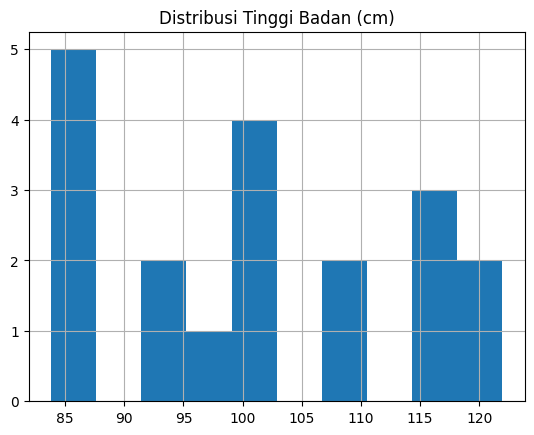

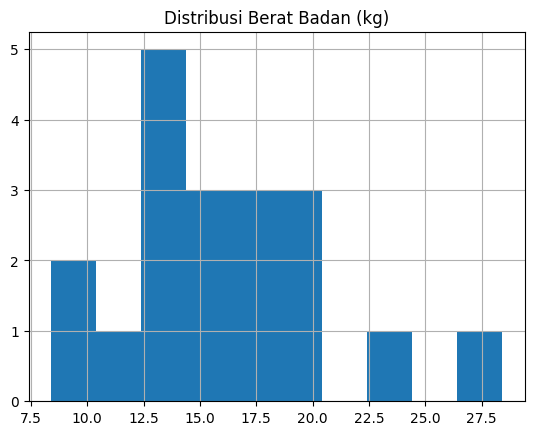

In [ ]:
import matplotlib.pyplot as plt

# Tinggi
body_measurement_df['height_cm'].hist()
plt.title("Distribusi Tinggi Badan (cm)")
plt.show()

# Berat
body_measurement_df['weight_kg'].hist()
plt.title("Distribusi Berat Badan (kg)")
plt.show()

TUGAS:

Apakah tinggi & berat menyebar rata atau menumpuk?
tinngi badaan tidak menyebar rata
Menumpuk (clustered) di sekitar nilai tertentu 160–175 )

berat badan juga tidak merata
cendrung menumpuk sekitar:50-80 kg






PRAKTIKUM 7 – Groupby Usia

Contoh kode:

In [ ]:

# Mean
group_mean_age = body_measurement_df.groupby("age").mean()
group_mean_age
# Agg lengkap
group_agg_age = body_measurement_df.groupby("age").agg({
    'height_cm': ['mean', 'min', 'max'],
    'weight_kg': ['mean', 'min', 'max']
})
group_agg_age

height_cm                 weight_kg              
           mean     min     max      mean    min    max
age                                                    
2     85.038000   83.82   86.36   11.2700   8.40  14.18
3     94.573333   92.71   96.52   14.2300  14.05  14.41
4    100.202500   99.06  101.60   15.4575  13.17  16.97
5    107.950000  106.68  109.22   17.6850  15.36  20.01
6    115.316667  114.30  116.59   19.2500  17.55  20.14
7    121.795000  121.67  121.92   25.6800  22.96  28.40

TUGAS:

Usia berapa rata-rata berat paling tinggi?
pada usia umur 23

Apakah tinggi meningkat sesuai usia?
tidak naik secara konsisten,tetapi sering naik pada
di usia 20-23,jadi tidak selalu meningkat pada usia



PRAKTIKUM 8 – Korelasi & Kovarian

Contoh kode:

In [ ]:
# Korelasi
corr_hw = body_measurement_df[['height_cm', 'weight_kg']].corr()
print(corr_hw)

# Kovarian
cov_hw = body_measurement_df[['height_cm', 'weight_kg']].cov()
print(cov_hw)

           height_cm  weight_kg
height_cm   1.000000   0.888014
weight_kg   0.888014   1.000000
            height_cm  weight_kg
height_cm  166.583840  54.525886
weight_kg   54.525886  22.632521


TUGAS:


Apakah korelasinya kuat/lemah?
Jika nilai corr_hw misalnya = 0.7 → hubungan kuat

Jika nilai corr_hw misalnya = 0.3 → hubungan lemah







Apakah hubungannya positif?
Arah hubungan ditentukan oleh tanda korelasi:
jika
dataset tinggi & berat badan maka hasilnya positif,begitu

Tugas di rumah

Silahkan piliah salaj satu dataset dari folder file (customers, orders, product, dan sales) link file

lalu lakukan semua step pada prakitkum 9 ini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
millioner_okeh = pd.read_csv('/content/customers.csv')

In [ ]:
millioner_okeh

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia
...,...,...,...,...,...,...,...,...,...
1002,996,fulan 996,Prefer not to say,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
1003,997,fulan 997,Prefer not to say,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia
1004,998,fulan 998,Prefer not to say,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia
1005,999,fulan 999,Prefer not to say,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia


In [ ]:
millioner_okeh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [ ]:
millioner_okeh.isna()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1002,False,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False,False,False


In [ ]:
millioner_okeh['customer_id'] = millioner_okeh['customer_id'].fillna("")


millioner_okeh.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [ ]:
millioner_okeh['gender'] =millioner_okeh['gender'].fillna (88)

In [ ]:
millioner_okeh.isna().sum()

,0
customer_id,0
customer_name,0
gender,0
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [ ]:
millioner_okeh.duplicated().sum()

np.int64(6)

In [ ]:
millioner_okeh.head(55)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia
5,6,fulan 6,Prefer not to say,40,7118 Mccullough SquareSuite 639,9996,Blakehaven,New South Wales,Australia
6,7,fulan 7,Prefer not to say,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia
7,8,fulan 8,Prefer not to say,75,383 Muller SummitSuite 809,7681,Samside,Northern Territory,Australia
8,9,fulan 9,Male,51,57 Greenfelder HillApt. 077,2,Beierport,Northern Territory,Australia
9,10,fulan 10,Prefer not to say,70,615 Hayley KnollSuite 454,2118,Joelburgh,Western Australia,Australia
